# Twitter Challenge 1


## Recall that you were asked to retrieve ~ 10K tweets last week.

## Do the following:

1. Use any Python package(s) of your choice
2. Perform text pre-processing
3. Generate a word cloud
4. Post the word cloud (image) as a Tweet (using your own Twitter account).

### Briefly describe: what is the topic? what is the data period?
### Include #is434 #smu #scis hashtags in your tweet.

In [8]:
import plotly.graph_objects as go
from twarc import Twarc2

# Convert JSON into Pandas data frame
import pandas as pd
df = pd.read_csv('tailwind.csv', names=('user', 'tweet', 'link', 'date'))
df

,user,tweet,link,date
0,@YannBrds,What's the one thing you always struggle with ...,https://twitter.com/YannBrds/status/1483749160...,"January 19, 2022 at 06:32PM"
1,@Canernc7,RT @hdjirdeh: I used @tailwindcss for the firs...,https://twitter.com/Canernc7/status/1483749613...,"January 19, 2022 at 06:34PM"
2,@DennisHelliar,@beyondcode @tailwindcss because @tailwindcss ...,https://twitter.com/DennisHelliar/status/14837...,"January 19, 2022 at 06:36PM"
3,@immoinulmoin,"Hi, I am looking for Upwork Agency whom I can ...",https://twitter.com/immoinulmoin/status/148375...,"January 19, 2022 at 06:37PM"
4,@Moose_Said,4) Now open you project through VScode or any ...,https://twitter.com/Moose_Said/status/14837529...,"January 19, 2022 at 06:47PM"
...,...,...,...,...
1995,@miss_Sumistha19,RT @RajdeepS019: That's it for today friends.\...,https://twitter.com/miss_Sumistha19/status/148...,"January 25, 2022 at 02:58AM"
1996,@Smilingempress,RT @csaba_kissi: If I could start my web devel...,https://twitter.com/Smilingempress/status/1485...,"January 25, 2022 at 02:58AM"
1997,@100xcode,RT @Neesh774: Days 21-24 of #100DaysOfCode \nW...,https://twitter.com/100xcode/status/1485688781...,"January 25, 2022 at 02:59AM"
1998,@miss_Sumistha19,RT @RajdeepS019: That's it for today friends.\...,https://twitter.com/miss_Sumistha19/status/148...,"January 25, 2022 at 02:59AM"


In [16]:
import numpy as np
import re

stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [20]:
list_of_words = df['tweet'].to_list()
edited = [clean_tweet(x) for x in list_of_words]

/var/folders/5w/l3l1gt911hbf2wt84hr0t4z80000gp/T/ipykernel_30964/1075154670.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


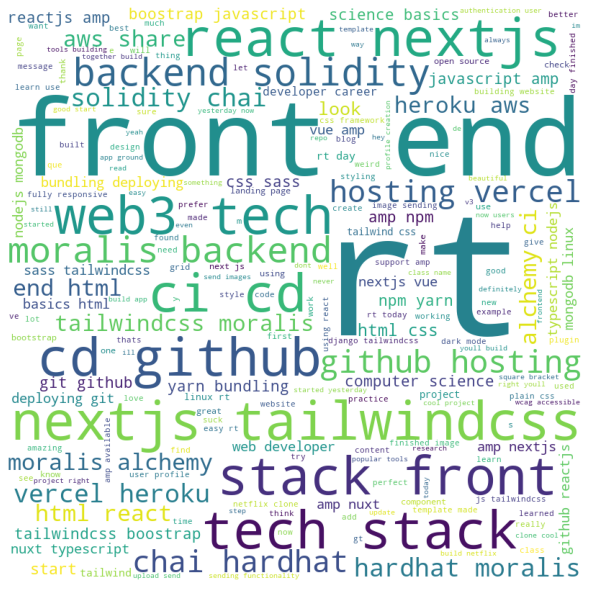

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in edited:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()